In [1]:
import os, glob
from pathlib import Path

import numpy as np
import pylab
from scipy.optimize import curve_fit
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from astropy.io import fits
from astropy.wcs import WCS
from astropy.table import Table

import matplotlib.colors as mc
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import colors
from matplotlib.colors import Normalize
import matplotlib.cm as cm


from scipy.interpolate import NearestNDInterpolator
from scipy import stats
import matplotlib.patheffects as PathEffects
from astropy.coordinates import Angle, SkyCoord, Longitude
from astropy.nddata.utils import Cutout2D
import astropy.units as u
from astropy.wcs.utils import pixel_to_skycoord
import astropy.io.fits as pyfits

from regions import Regions
from spectral_cube import SpectralCube
from spectral_cube import Projection

basepath = '/home/j_poz/documents/milkywaylab/data'

In [2]:
#Paths and definitions\n",
#ratiodir = '/Users/clairecook/CMZ-Central20pc/EVFs/DATATEST/RatioMaps/' #Dir where ratio maps are, w/ folders for each EVF
#catpath = '/Users/clairecook/CMZ-Central20pc/EVFs/DATATEST/Chemistry/RatioMap_Stats_AllEVFs.txt' #Path for EVF ratio map stats catalog
ratiodir = f'{basepath}/images/ratio_maps'
catpath = f'{basepath}/tables/RatioMap_Stats_AllEVFs.txt' #Path for catalogue we'll make to tabulate statistical properties of all EVF ratio maps (will be made if does not exist)
evftablepath = f'{basepath}/tables/physical_properties_paper_tab.tex'


In [3]:
#Get array of all EVF's we have line ratio maps made for
source_names = [] #array for source names/folder names
for folder in os.listdir(ratiodir): #goes through source name folders in ratiodir & saves the names to an array
    foldername = os.fsdecode(folder)
    if foldername.startswith('.'): #avoids hidden files/folders
        pass
    else: 
        source_names.append(foldername)
print(len(source_names), 'EVFs')

125 EVFs


In [4]:
cols = ["ID Number","l","b","VLSR","delta V","Verticality","Size", "Median Intensity","Fitted FWHM","PV Feature","Detection Method"]

evftable = Table.read(evftablepath, comment=r'\\', names=cols, data_start=0, data_end=235)
#evftable.pprint_all() #prints ALL of the table without any truncation with ellipses\n",

#Open the data into arrays for each column\n",
X1,H13CN_CS21_Average,H13CN_CS21_Median,H13CN_CS21_StdDev,H13COp_CS21_Average,H13COp_CS21_Median,H13COp_CS21_StdDev,H13COp_H13CN_Average,H13COp_H13CN_Median,H13COp_H13CN_StdDev,HC3N_CS21_Average,HC3N_CS21_Median,HC3N_CS21_StdDev,HC3N_H13CN_Average,HC3N_H13CN_Median,HC3N_H13CN_StdDev,HC3N_H13COp_Average,HC3N_H13COp_Median,HC3N_H13COp_StdDev,HC3N_HN13C_Average,HC3N_HN13C_Median,HC3N_HN13C_StdDev,HC3N_SiO21_Average,HC3N_SiO21_Median,HC3N_SiO21_StdDev,HC3N_SO21_Average,HC3N_SO21_Median,HC3N_SO21_StdDev,HC3N_SO32_Average,HC3N_SO32_Median,HC3N_SO32_StdDev,HN13C_CS21_Average,HN13C_CS21_Median,HN13C_CS21_StdDev,HN13C_H13CN_Average,HN13C_H13CN_Median,HN13C_H13CN_StdDev,HN13C_H13COp_Average,HN13C_H13COp_Median,HN13C_H13COp_StdDev,HN13C_SiO21_Average,HN13C_SiO21_Median,HN13C_SiO21_StdDev,HN13C_SO21_Average,HN13C_SO21_Median,HN13C_SO21_StdDev,HN13C_SO32_Average,HN13C_SO32_Median,HN13C_SO32_StdDev,HNCO_CS21_Average,HNCO_CS21_Median,HNCO_CS21_StdDev,HNCO_H13CN_Average,HNCO_H13CN_Median,HNCO_H13CN_StdDev,HNCO_H13COp_Average,HNCO_H13COp_Median,HNCO_H13COp_StdDev,HNCO_HC3N_Average,HNCO_HC3N_Median,HNCO_HC3N_StdDev,HNCO_HN13C_Average,HNCO_HN13C_Median,HNCO_HN13C_StdDev,HNCO_SiO21_Average,HNCO_SiO21_Median,HNCO_SiO21_StdDev,HNCO_SO21_Average,HNCO_SO21_Median,HNCO_SO21_StdDev,HNCO_SO32_Average,HNCO_SO32_Median,HNCO_SO32_StdDev,SiO21_CS21_Average,SiO21_CS21_Median,SiO21_CS21_StdDev,SiO21_H13CN_Average,SiO21_H13CN_Median,SiO21_H13CN_StdDev,SiO21_H13COp_Average,SiO21_H13COp_Median,SiO21_H13COp_StdDev,SO21_CS21_Average,SO21_CS21_Median,SO21_CS21_StdDev,SO21_H13CN_Average,SO21_H13CN_Median,SO21_H13CN_StdDev,SO21_H13COp_Average,SO21_H13COp_Median,SO21_H13COp_StdDev,SO21_SiO21_Average,SO21_SiO21_Median,SO21_SiO21_StdDev,SO21_SO32_Average,SO21_SO32_Median,SO21_SO32_StdDev,SO32_CS21_Average,SO32_CS21_Median,SO32_CS21_StdDev,SO32_H13CN_Average,SO32_H13CN_Median,SO32_H13CN_StdDev,SO32_H13COp_Average,SO32_H13COp_Median,SO32_H13COp_StdDev,SO32_SiO21_Average,SO32_SiO21_Median,SO32_SiO21_StdDev=np.genfromtxt(catpath, dtype=float,skip_header=1,filling_values = -99.99, unpack=True)
data = np.loadtxt(catpath, dtype=str,skiprows=1, unpack=True) #for text
evf_name = data[0]

evf_num = evftable['ID Number'].data 
l = evftable['l'].data
b = evftable['b'].data
pv_class = evftable['PV Feature'].data

evf_names_pvtab =[] #names from table that has pv classifications\n",
evf_names_stat =[] #from stat table. will be missing problematic EVFs w/ missing line ratio maps\n",
i=0
while i<len(evf_num):
    evf_id = 'evf' + str(evf_num[i])
    evf_names_pvtab.append(evf_id)
    i+=1

#Stripping the rest of the EVF ID beyond evf00 from evf_name\n",
i=0
while i<len(evf_name):
    array = evf_name[i].split('_')
    evf_names_stat.append(array[0])
    i+=1

#col = ['#36005e','#af2650','k', '#c83942', '#da9f66', '#d8d296']\n",

#col = ['#36005e','#af2650','k', '#d8d296','#da9f66']\n",
col = ['purple','#af2650','k', '#d8d296','#da9f66']

def single_gauss(x,mu,sig, A):
    return A*np.exp(-(x-mu)**2/(2*sig**2))

def double_gauss(x,mu1,mu2,A1,A2,sig1,sig2):
    return single_gauss(x,mu1,sig1,A1)+single_gauss(x,mu2,sig2,A2)

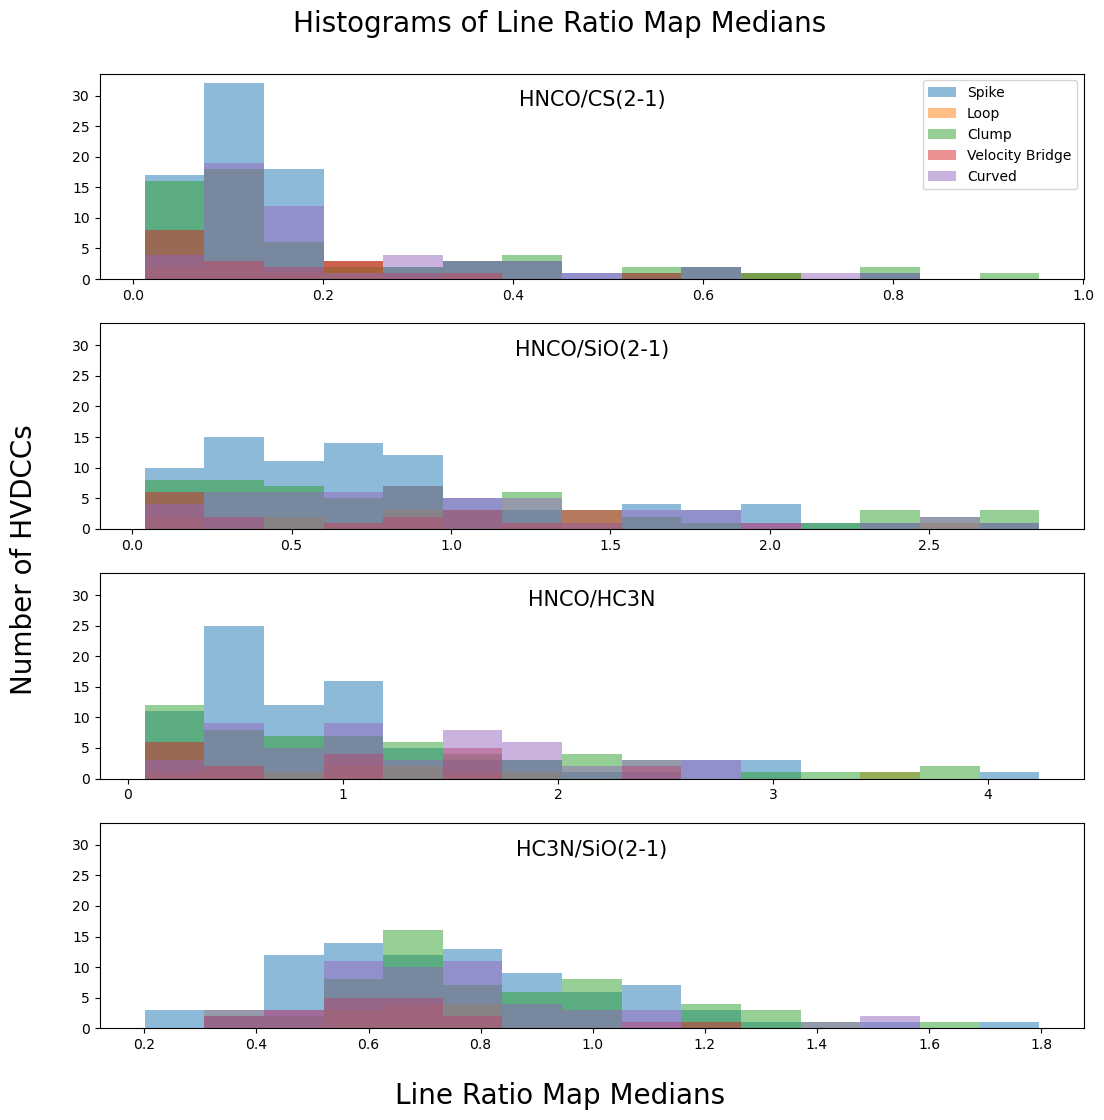

In [11]:
nbins=int(np.sqrt(235))

#Make histogram figure color-coded by PV classification
fig, axs = plt.subplots(4, sharex=False, sharey=True, figsize=(11,11))
fig.suptitle('Histograms of Line Ratio Map Medians', x=0.5,y= 1.0, fontsize=20)
fig.supxlabel("Line Ratio Map Medians", x=0.5, y=0.0, fontsize=20)
fig.supylabel("Number of HVDCCs", x=0.0, y=0.50, fontsize=20)

fig.tight_layout()

#HNCO/CS21
pv_s_med = []
pv_cl_med = []
pv_vb_med = []
pv_l_med =[]
pv_cu_med =[]

pv_un_med = [] #for unclassified ('-')
pv_2_med = [] #for those with 2 designated pv classifications

i=0
while i<len(evf_names_pvtab):
    if(evf_names_pvtab[i]=='evf60'):
        i+=1
    elif (evf_names_pvtab[i]=='evf83'):
        i+=1
    else:
        #Get what index this EVF is for evf_names_stat to be able to grab its stats
        for x in evf_names_stat:
            if x==evf_names_pvtab[i]:
                ind = evf_names_stat.index(x)
                if pv_class[i]=='S' or pv_class[i]=='S?':
                    pv_s_med.append(HNCO_CS21_Median[ind])
                elif pv_class[i]=='CL' or pv_class[i]=='CL?':
                    pv_cl_med.append(HNCO_CS21_Median[ind])
                elif pv_class[i]=='VB' or pv_class[i]=='VB?' :
                    pv_vb_med.append(HNCO_CS21_Median[ind])
                elif pv_class[i]=='L':
                    pv_l_med.append(HNCO_CS21_Median[ind])
                elif pv_class[i]=='CU':
                    pv_cu_med.append(HNCO_CS21_Median[ind])
                elif pv_class[i]=='-':
                    pv_un_med.append(HNCO_CS21_Median[ind])
                elif pv_class[i]=='S, VB?':
                    pv_s_med.append(HNCO_CS21_Median[ind])
                    pv_vb_med.append(HNCO_CS21_Median[ind])
                elif pv_class[i]=='S, CL?':
                    pv_s_med.append(HNCO_CS21_Median[ind])
                    pv_cl_med.append(HNCO_CS21_Median[ind])
                elif pv_class[i]=='CL, CU?':
                    pv_cl_med.append(HNCO_CS21_Median[ind])
                    pv_cu_med.append(HNCO_CS21_Median[ind])
                elif pv_class[i]=='L, VB?':
                    pv_l_med.append(HNCO_CS21_Median[ind])
                    pv_vb_med.append(HNCO_CS21_Median[ind])
                elif pv_class[i]=='L, S':
                    pv_l_med.append(HNCO_CS21_Median[ind])
                    pv_s_med.append(HNCO_CS21_Median[ind])
                elif pv_class[i]=='CL, CU':
                    pv_cl_med.append(HNCO_CS21_Median[ind])
                    pv_cu_med.append(HNCO_CS21_Median[ind])
                elif pv_class[i]=='CU, S':
                    pv_cu_med.append(HNCO_CS21_Median[ind])
                    pv_s_med.append(HNCO_CS21_Median[ind])
                else: 
                    print('HNCO_CS21', pv_class[i])
        i+=1
_, bin_edges = np.histogram(np.concatenate([pv_cl_med, pv_vb_med, pv_cu_med, pv_l_med, pv_s_med]), bins=nbins)
axs[0].hist(pv_s_med, bins=bin_edges, density=False, alpha=0.5, label='Spike')
axs[0].hist(pv_l_med, bins=bin_edges, density=False, alpha=0.5, label='Loop')
axs[0].hist(pv_cl_med, bins=bin_edges, density=False, alpha=0.5, label='Clump')
axs[0].hist(pv_vb_med, bins=bin_edges, density=False, alpha=0.5, label='Velocity Bridge')
axs[0].hist(pv_cu_med, bins=bin_edges, density=False, alpha=0.5, label='Curved')
#popt, pcov = curve_fit(single_gauss, bin_edges[:-1], counts[0])
#axs[0].plot(bin_edges[:-1], single_gauss(bin_edges[:-1], *popt)/3, 'r-')
#axs[0].axvline(x=np.median(HNCO_CS21_Median), color='k',linestyle='dashed', label='Median')
axs[0].set_title("HNCO/CS(2-1)", loc='center', y=0.8, fontsize=15)
axs[0].legend()

#HNCO/SiO21
pv_s_med = []
pv_cl_med = []
pv_vb_med = []
pv_l_med =[]
pv_cu_med =[]

pv_un_med = []
pv_2_med = []

i=0
while i<len(evf_names_pvtab):
    if(evf_names_pvtab[i]=='evf60'):
        i+=1
    elif (evf_names_pvtab[i]=='evf83'):
        i+=1
    else:
        for x in evf_names_stat:
            if x==evf_names_pvtab[i]:
                ind = evf_names_stat.index(x)
                if pv_class[i]=='S' or pv_class[i]=='S?':
                    pv_s_med.append(HNCO_SiO21_Median[ind])
                elif pv_class[i]=='CL' or pv_class[i]=='CL?':
                    pv_cl_med.append(HNCO_SiO21_Median[ind])
                elif pv_class[i]=='VB' or pv_class[i]=='VB?' :
                    pv_vb_med.append(HNCO_SiO21_Median[ind])
                elif pv_class[i]=='L':
                    pv_l_med.append(HNCO_SiO21_Median[ind])
                elif pv_class[i]=='CU':
                    pv_cu_med.append(HNCO_SiO21_Median[ind])
                elif pv_class[i]=='-':
                    pv_un_med.append(HNCO_SiO21_Median[ind])
                elif pv_class[i]=='S, VB?':
                    pv_s_med.append(HNCO_SiO21_Median[ind])
                    pv_vb_med.append(HNCO_SiO21_Median[ind])
                elif pv_class[i]=='S, CL?':
                    pv_s_med.append(HNCO_SiO21_Median[ind])
                    pv_cl_med.append(HNCO_SiO21_Median[ind])
                elif pv_class[i]=='CL, CU?':
                    pv_cl_med.append(HNCO_SiO21_Median[ind])
                    pv_cu_med.append(HNCO_SiO21_Median[ind])
                elif pv_class[i]=='L, VB?':
                    pv_l_med.append(HNCO_SiO21_Median[ind])
                    pv_vb_med.append(HNCO_SiO21_Median[ind])
                elif pv_class[i]=='L, S':
                    pv_l_med.append(HNCO_SiO21_Median[ind])
                    pv_s_med.append(HNCO_SiO21_Median[ind])
                elif pv_class[i]=='CL, CU':
                    pv_cl_med.append(HNCO_SiO21_Median[ind])
                    pv_cu_med.append(HNCO_SiO21_Median[ind])
                elif pv_class[i]=='CU, S':
                    pv_cu_med.append(HNCO_SiO21_Median[ind])
                    pv_s_med.append(HNCO_SiO21_Median[ind])
                else: 
                    print('HNCO_SiO21', pv_class[i])
        i+=1

_, bin_edges = np.histogram(np.concatenate([pv_cl_med, pv_vb_med, pv_cu_med, pv_l_med, pv_s_med]), bins=nbins)
axs[1].hist(pv_s_med, bins=bin_edges, density=False, alpha=0.5)
axs[1].hist(pv_l_med, bins=bin_edges, density=False, alpha=0.5)
axs[1].hist(pv_cl_med, bins=bin_edges, density=False, alpha=0.5)
axs[1].hist(pv_vb_med, bins=bin_edges, density=False, alpha=0.5)
axs[1].hist(pv_cu_med, bins=bin_edges, density=False, alpha=0.5)
#popt, pcov = curve_fit(single_gauss, bin_edges[:-1], counts[0])
#axs[1].plot(bin_edges[:-1], single_gauss(bin_edges[:-1], *popt)/3, 'r-')
#axs[1].axvline(x=np.median(HNCO_SiO21_Median), color='k',linestyle='dashed', label='Median')
axs[1].set_title('HNCO/SiO(2-1)', loc='center', y=0.8, fontsize=15)

#HNCO/HC3N
pv_s_med = []
pv_cl_med = []
pv_vb_med = []
pv_l_med =[]
pv_cu_med =[]

pv_un_med = []
pv_2_med = []

i=0
while i<len(evf_names_pvtab):
    if(evf_names_pvtab[i]=='evf60'):
        i+=1
    elif (evf_names_pvtab[i]=='evf83'):
        i+=1
    else:
        for x in evf_names_stat:
            if x==evf_names_pvtab[i]:
                ind = evf_names_stat.index(x)
                if pv_class[i]=='S' or pv_class[i]=='S?':
                    pv_s_med.append(HNCO_HC3N_Median[ind])
                elif pv_class[i]=='CL' or pv_class[i]=='CL?':
                    pv_cl_med.append(HNCO_HC3N_Median[ind])
                elif pv_class[i]=='VB' or pv_class[i]=='VB?' :
                    pv_vb_med.append(HNCO_HC3N_Median[ind])
                elif pv_class[i]=='L':
                    pv_l_med.append(HNCO_HC3N_Median[ind])
                elif pv_class[i]=='CU':
                    pv_cu_med.append(HNCO_HC3N_Median[ind])
                elif pv_class[i]=='-':
                    pv_un_med.append(HNCO_HC3N_Median[ind])
                elif pv_class[i]=='S, VB?':
                    pv_s_med.append(HNCO_HC3N_Median[ind])
                    pv_vb_med.append(HNCO_HC3N_Median[ind])
                elif pv_class[i]=='S, CL?':
                    pv_s_med.append(HNCO_HC3N_Median[ind])
                    pv_cl_med.append(HNCO_HC3N_Median[ind])
                elif pv_class[i]=='CL, CU?':
                    pv_cl_med.append(HNCO_HC3N_Median[ind])
                    pv_cu_med.append(HNCO_HC3N_Median[ind])
                elif pv_class[i]=='L, VB?':
                    pv_l_med.append(HNCO_HC3N_Median[ind])
                    pv_vb_med.append(HNCO_HC3N_Median[ind])
                elif pv_class[i]=='L, S':
                    pv_l_med.append(HNCO_HC3N_Median[ind])
                    pv_s_med.append(HNCO_HC3N_Median[ind])
                elif pv_class[i]=='CL, CU':
                    pv_cl_med.append(HNCO_HC3N_Median[ind])
                    pv_cu_med.append(HNCO_HC3N_Median[ind])
                elif pv_class[i]=='CU, S':
                    pv_cu_med.append(HNCO_HC3N_Median[ind])
                    pv_s_med.append(HNCO_HC3N_Median[ind])
                else: 
                    print('HNCO_HC3N', pv_class[i])
        i+=1

_, bin_edges = np.histogram(np.concatenate([pv_cl_med, pv_vb_med, pv_cu_med, pv_l_med, pv_s_med]), bins=nbins)
axs[2].hist(pv_s_med, bins=bin_edges, density=False, alpha=0.5)
axs[2].hist(pv_l_med, bins=bin_edges, density=False, alpha=0.5)
axs[2].hist(pv_cl_med, bins=bin_edges, density=False, alpha=0.5)
axs[2].hist(pv_vb_med, bins=bin_edges, density=False, alpha=0.5)
axs[2].hist(pv_cu_med, bins=bin_edges, density=False, alpha=0.5)
#popt, pcov = curve_fit(single_gauss, bin_edges[:-1], counts[0])
#axs[2].plot(bin_edges[:-1], single_gauss(bin_edges[:-1], *popt), 'r-')
#axs[2].axvline(x=np.median(HNCO_HC3N_Median), color='k',linestyle='dashed', label='Median')
axs[2].set_title('HNCO/HC3N', loc='center', y=0.8, fontsize=15)

#HC3N/SiO21
pv_s_med = []
pv_cl_med = []
pv_vb_med = []
pv_l_med =[]
pv_cu_med =[]

pv_un_med = []
pv_2_med = []

i=0
while i<len(evf_names_pvtab):
    if(evf_names_pvtab[i]=='evf60'):
        i+=1
    elif (evf_names_pvtab[i]=='evf83'):
        i+=1
    else:
        for x in evf_names_stat:
            if x==evf_names_pvtab[i]:
                ind = evf_names_stat.index(x)
                if pv_class[i]=='S' or pv_class[i]=='S?':
                    pv_s_med.append(HC3N_SiO21_Median[ind])
                elif pv_class[i]=='CL' or pv_class[i]=='CL?':
                    pv_cl_med.append(HC3N_SiO21_Median[ind])
                elif pv_class[i]=='VB' or pv_class[i]=='VB?' :
                    pv_vb_med.append(HC3N_SiO21_Median[ind])
                elif pv_class[i]=='L':
                    pv_l_med.append(HC3N_SiO21_Median[ind])
                elif pv_class[i]=='CU':
                    pv_cu_med.append(HC3N_SiO21_Median[ind])
                elif pv_class[i]=='-':
                    pv_un_med.append(HC3N_SiO21_Median[ind])
                elif pv_class[i]=='S, VB?':
                    pv_s_med.append(HC3N_SiO21_Median[ind])
                    pv_vb_med.append(HC3N_SiO21_Median[ind])
                elif pv_class[i]=='S, CL?':
                    pv_s_med.append(HC3N_SiO21_Median[ind])
                    pv_cl_med.append(HC3N_SiO21_Median[ind])
                elif pv_class[i]=='CL, CU?':
                    pv_cl_med.append(HC3N_SiO21_Median[ind])
                    pv_cu_med.append(HC3N_SiO21_Median[ind])
                elif pv_class[i]=='L, VB?':
                    pv_l_med.append(HC3N_SiO21_Median[ind])
                    pv_vb_med.append(HC3N_SiO21_Median[ind])
                elif pv_class[i]=='L, S':
                    pv_l_med.append(HC3N_SiO21_Median[ind])
                    pv_s_med.append(HC3N_SiO21_Median[ind])
                elif pv_class[i]=='CL, CU':
                    pv_cl_med.append(HC3N_SiO21_Median[ind])
                    pv_cu_med.append(HC3N_SiO21_Median[ind])
                elif pv_class[i]=='CU, S':
                    pv_cu_med.append(HC3N_SiO21_Median[ind])
                    pv_s_med.append(HC3N_SiO21_Median[ind])
                else: 
                    print('HC3N_SiO21', pv_class[i])
        i+=1

_, bin_edges = np.histogram(np.concatenate([pv_cl_med, pv_vb_med, pv_cu_med, pv_l_med, pv_s_med]), bins=nbins)
axs[3].hist(pv_s_med, bins=bin_edges, density=False, alpha=0.5)
axs[3].hist(pv_l_med, bins=bin_edges, density=False, alpha=0.5)
axs[3].hist(pv_cl_med, bins=bin_edges, density=False, alpha=0.5)
axs[3].hist(pv_vb_med, bins=bin_edges, density=False, alpha=0.5)
axs[3].hist(pv_cu_med, bins=bin_edges, density=False, alpha=0.5)

#popt, pcov = curve_fit(single_gauss, bin_edges[:-1], counts)
#axs[3].plot(bin_edges[:-1], single_gauss(bin_edges[:-1], *popt), 'r-')
#axs[3].axvline(x=np.median(HC3N_SiO21_Median), color='k',linestyle='dashed', label='Median')

axs[3].set_title('HC3N/SiO(2-1)', loc='center', y=0.8, fontsize=15)

plt.show()


In [ ]:
fig=plt.figure()
gs=GridSpec(5, 4, figure=fig)

#HNCO/CS21
pv_s_med = []
pv_cl_med = []
pv_vb_med = []
pv_l_med =[]
pv_cu_med =[]

pv_un_med = [] #for unclassified ('-')
pv_2_med = [] #for those with 2 designated pv classifications

i=0
while i<len(evf_names_pvtab):
    if(evf_names_pvtab[i]=='evf60'):
        i+=1
    elif (evf_names_pvtab[i]=='evf83'):
        i+=1
    else:
        #Get what index this EVF is for evf_names_stat to be able to grab its stats
        for x in evf_names_stat:
            if x==evf_names_pvtab[i]:
                ind = evf_names_stat.index(x)
                if pv_class[i]=='S' or pv_class[i]=='S?':
                    pv_s_med.append(HNCO_CS21_Median[ind])
                elif pv_class[i]=='CL' or pv_class[i]=='CL?':
                    pv_cl_med.append(HNCO_CS21_Median[ind])
                elif pv_class[i]=='VB' or pv_class[i]=='VB?' :
                    pv_vb_med.append(HNCO_CS21_Median[ind])
                elif pv_class[i]=='L':
                    pv_l_med.append(HNCO_CS21_Median[ind])
                elif pv_class[i]=='CU':
                    pv_cu_med.append(HNCO_CS21_Median[ind])
                elif pv_class[i]=='-':
                    pv_un_med.append(HNCO_CS21_Median[ind])
                elif pv_class[i]=='S, VB?':
                    pv_s_med.append(HNCO_CS21_Median[ind])
                    pv_vb_med.append(HNCO_CS21_Median[ind])
                elif pv_class[i]=='S, CL?':
                    pv_s_med.append(HNCO_CS21_Median[ind])
                    pv_cl_med.append(HNCO_CS21_Median[ind])
                elif pv_class[i]=='CL, CU?':
                    pv_cl_med.append(HNCO_CS21_Median[ind])
                    pv_cu_med.append(HNCO_CS21_Median[ind])
                elif pv_class[i]=='L, VB?':
                    pv_l_med.append(HNCO_CS21_Median[ind])
                    pv_vb_med.append(HNCO_CS21_Median[ind])
                elif pv_class[i]=='L, S':
                    pv_l_med.append(HNCO_CS21_Median[ind])
                    pv_s_med.append(HNCO_CS21_Median[ind])
                elif pv_class[i]=='CL, CU':
                    pv_cl_med.append(HNCO_CS21_Median[ind])
                    pv_cu_med.append(HNCO_CS21_Median[ind])
                elif pv_class[i]=='CU, S':
                    pv_cu_med.append(HNCO_CS21_Median[ind])
                    pv_s_med.append(HNCO_CS21_Median[ind])
                else: 
                    print('HNCO_CS21', pv_class[i])
pvs = [pv_cl_med, pv_cu_med, pv_l_med, pv_s_med, pv_vb_med]
for i in range(5): 

    fig.add_subplot(gs[i,0])
    plt.hist(pvs[i], nbins=20)
for i in range(5): fig.add_subplot(gs[i,1])
for i in range(5): fig.add_subplot(gs[i,2])
for i in range(5): fig.add_subplot(gs[i,3])


In [23]:
for i in range(3): print(i)

0
1
2
3


In [28]:
np.zeros??

Docstring:
zeros(shape, dtype=float, order='C', *, like=None)

Return a new array of given shape and type, filled with zeros.

Parameters
----------
shape : int or tuple of ints
    Shape of the new array, e.g., ``(2, 3)`` or ``2``.
dtype : data-type, optional
    The desired data-type for the array, e.g., `numpy.int8`.  Default is
    `numpy.float64`.
order : {'C', 'F'}, optional, default: 'C'
    Whether to store multi-dimensional data in row-major
    (C-style) or column-major (Fortran-style) order in
    memory.
like : array_like, optional
    Reference object to allow the creation of arrays which are not
    NumPy arrays. If an array-like passed in as ``like`` supports
    the ``__array_function__`` protocol, the result will be defined
    by it. In this case, it ensures the creation of an array object
    compatible with that passed in via this argument.

    .. versionadded:: 1.20.0

Returns
-------
out : ndarray
    Array of zeros with the given shape, dtype, and order.

See Al